In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
# Set Random Seed
seed = np.random.seed(2024)
sns.set_theme(context = 'paper')
# 1. darkolivegreen
# 2. olive
# 3. darkkhaki
# 4. yellowgreen
# 5. olivedrab

### <span style="color: darkkhaki;"> 

# <span style="color: darkolivegreen;"> Credit Card Fraud Detection</span>

The performance of fraud detection in credit card transactions is greatly affected by the **sampling approach on dataset**, **selection of variables** and **detection technique(s)** used.

**<span style="color: olive;">Objective**

**<span style="color: olive;">Project Pipeline**
- Import and understand the fraud data
- See if the data has any shortcomings like missing data or imbalance, and then fix them
- Train models on the data using K-Fold Cross Validation
- Evaluate the performance of the models using various metrics
- Rank the model based on their performance and visualize the results

**<span style="color: olive;">i. Data Exploring**
    
**<span style="color: olive;">ii. Pre-processing**

**<span style="color: olive;">iii. Modeling**

**<span style="color: olive;">iv. Evaluation**

## <span style="color: olive;">Objective
### <span style="color: darkkhaki;">Credit Card Fraud 
Credit card fraud is the unauthorized use of a credit card to make purchases or withdraw funds.
### <span style="color: darkkhaki;">Source 
The dataset contains transactions made by credit cards in September 2013 by European cardholders, and also available in Kaggle.
### <span style="color: darkkhaki;">Objective
to detect fraudulent credit card transactions or not based on synthetic features

## <span style="color: olive;">i. Data Exploring
- It contains only numerical input variables which are the result of a PCA transformation. 
- There are a total of 31 features in the dataset.
    - `V1, V2, … V28` are the principal components obtained with PCA
    - `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset.
    - `Amount` is the transaction Amount
    - Target: `Class` 1 in case of fraud and 0 otherwise.
### <span style="color: darkkhaki;">a. Load the dataset

In [2]:
df = pd.read_csv('creditcard.csv')
display(df.head())
print('Number column of the dataset:', df.shape[0])
print('Number row of the dataset:', df.shape[1])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Number column of the dataset: 284807
Number row of the dataset: 31


### <span style="color: darkkhaki;"> b. Data Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### <span style="color: darkkhaki;"> c. Class Distribution

In [4]:
class_counts = df['Class'].value_counts()
display(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64

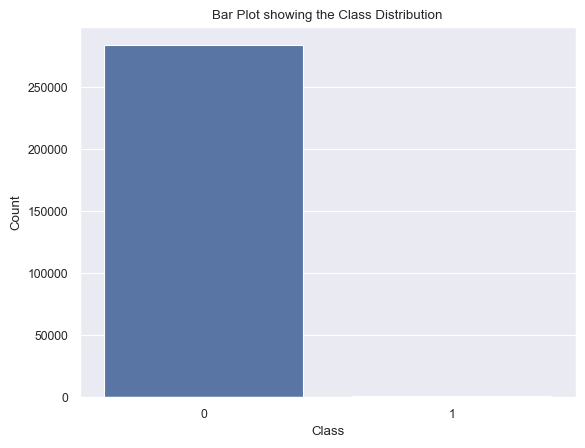

In [5]:
sns.barplot(x=class_counts.index, y=class_counts.values);
plt.title('Bar Plot showing the Class Distribution');
plt.xlabel('Class');
plt.ylabel('Count');

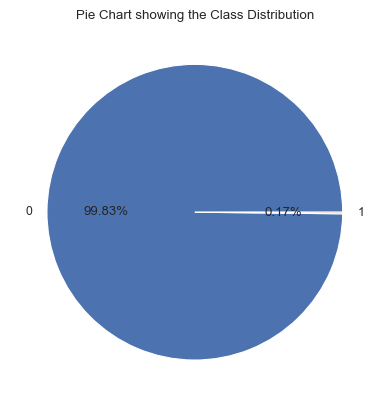

In [6]:
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%');
plt.title('Pie Chart showing the Class Distribution');

As we can see, the dataset is very imbalanced as most of the transaction are **Non-Fraud**. Use this dataset for predictive models might cause a lot of errors because the models will tend to overfit since it gonna assume the most transactions are Non-Fraud

# <span style="color: olive;"> ii. Pre-processing
## <span style="color: darkkhaki;"> 1. Data Cleaning (Outlier Detection) 
### <span style="color: yellowgreen;"> a. Check for `Null` value

In [7]:
# CHECK
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### <span style="color: yellowgreen;"> b. Check for Duplicates

In [8]:
# CHECK
df.duplicated().sum()

1081

There are 1081 duplicated rows in the dataset. Duplicate rows can skew the analysis and the results of the model trainning, as they can introduce bias and potentially lead to overfitting.
Removing duplicates is generally a good practice in data preprocessing, especially in a sensitive task like fraud detection where accuracy is critical. So, I am gonna remove that.

In [9]:
# Remove the Duplicate Rows
df = df.drop_duplicates()
# Verify the number of rows after removing duplicates
print('Number of rows after removing duplicates:',df.shape[0])

Number of rows after removing duplicates: 283726


In [10]:
class_counts = df['Class'].value_counts()
display(class_counts)

Class
0    283253
1       473
Name: count, dtype: int64

## <span style="color: darkkhaki;"> 2. Data Transformation
### <span style="color: yellowgreen;"> a. Variable Scaling
https://hersanyagci.medium.com/feature-scaling-with-scikit-learn-for-data-science-8c4cbcf2daff

### Plot the distribution of Transaction `Amount` and `Time`    

/var/folders/3v/hv8gygz544x36c5wqqmmn5c80000gn/T/ipykernel_48888/2576472095.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'], ax=axes[0])
/var/folders/3v/hv8gygz544x36c5wqqmmn5c80000gn/T/ipykernel_48888/2576472095.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'], ax

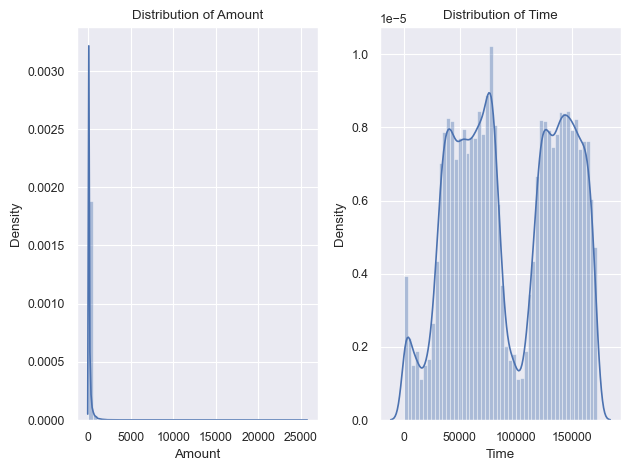

In [11]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2)  # Adjust figsize as needed

# Plot the distribution of 'Amount' on the first subplot
sns.distplot(df['Amount'], ax=axes[0])
axes[0].set_title('Distribution of Amount')

# Plot the distribution of 'Time' on the second subplot
sns.distplot(df['Time'], ax=axes[1])
axes[1].set_title('Distribution of Time')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Box Plot of  Transaction `Amount` and `Time` 

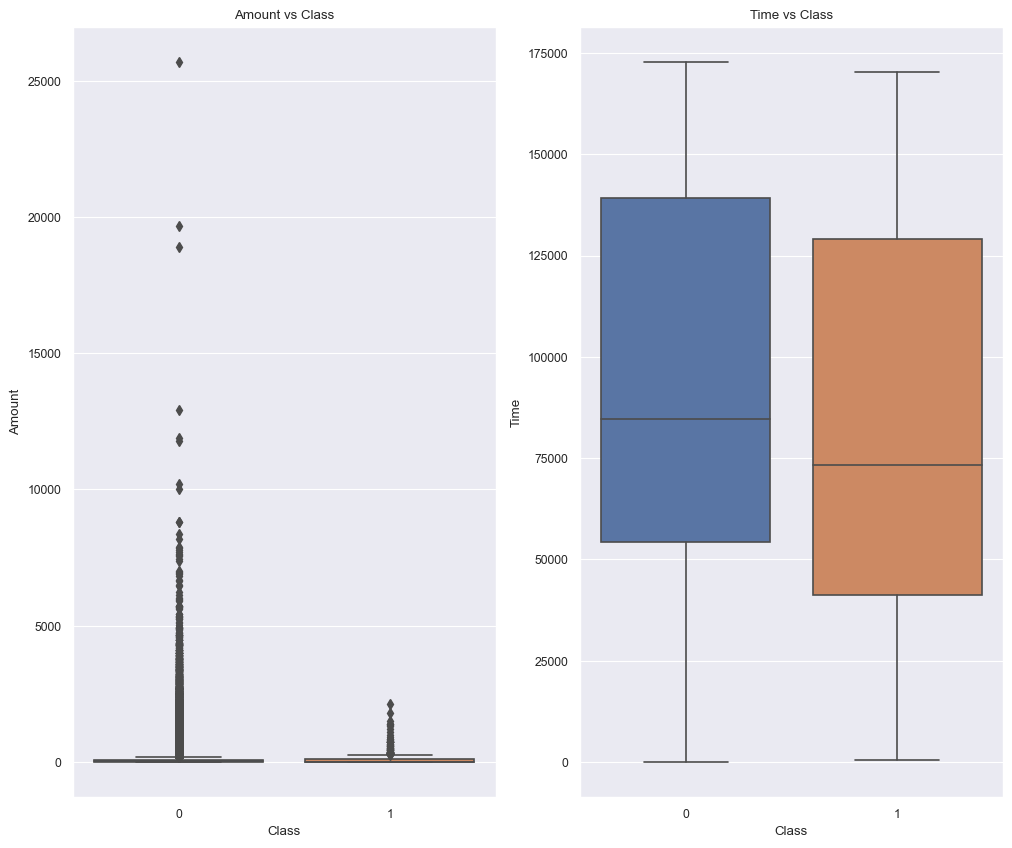

In [12]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
## Boxplot of 'Amount' vs 'Class'
sns.boxplot(data=df, x='Class', y='Amount', ax=axes[0])
axes[0].set_title('Amount vs Class');
## Boxplot of 'Time' vs 'Class'
sns.boxplot(data=df, x='Class', y='Time', ax=axes[1])
axes[1].set_title('Time vs Class');

### Scaling Transaction `Amount`

`Amount` is not normally distributed. So I either do `RobustScaler` or `Log Transformation`

Im choosing `Log Transformation` in this case as Applying a logarithmic transformation can help in reducing the skewness of the distribution. This can be particularly useful if your transaction amounts span several orders of magnitude.

/var/folders/3v/hv8gygz544x36c5wqqmmn5c80000gn/T/ipykernel_48888/4017627355.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_scaled['Amount_scaled'].values);


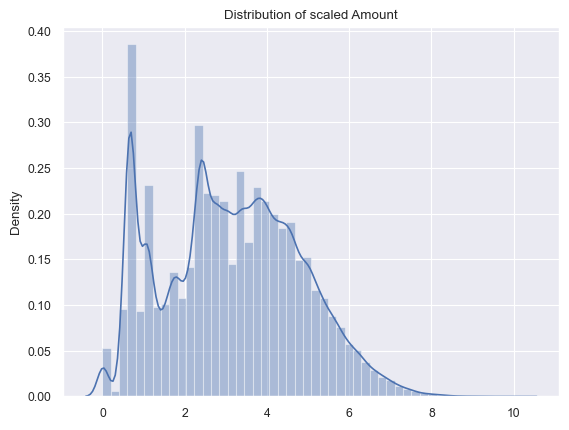

In [13]:
df_scaled = df.copy()

df_scaled['Amount_scaled'] = np.log1p(df_scaled['Amount'])  # log1p is used to avoid log(0)
sns.distplot(df_scaled['Amount_scaled'].values);
plt.title('Distribution of scaled Amount');

### Scaling Transaction `Time`
Transaction Time often represents the time elapsed since a reference point (e.g., the start of data collection). It's a continuous variable, and its distribution can vary significantly.
We can use `StandardScaler` or `MinMaxScaler`:
- `StandardScaler`: This scaler standardizes features by removing the mean and scaling to unit variance. It's useful if the transaction times are normally distributed.
- `MinMaxScaler`: This scaler scales features to a range, typically between 0 and 1. It's useful if the transaction times have a known range or if we want to normalize the time values.

Im choosing `StandardScaler` in this case as the `Time` is not really skewed.

/var/folders/3v/hv8gygz544x36c5wqqmmn5c80000gn/T/ipykernel_48888/3357283373.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_scaled['Time_scaled'].values);


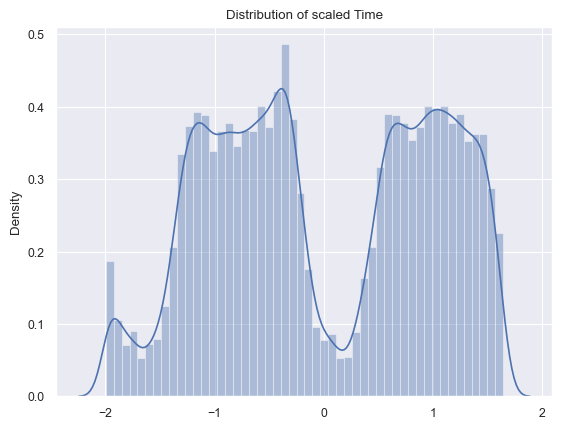

In [14]:
## StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled['Time_scaled'] = scaler.fit_transform(df_scaled[['Time']])

sns.distplot(df_scaled['Time_scaled'].values);
plt.title('Distribution of scaled Time');

### Box Plot of  Transaction `Amount_scaled` and `Time_scaled` 
https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8

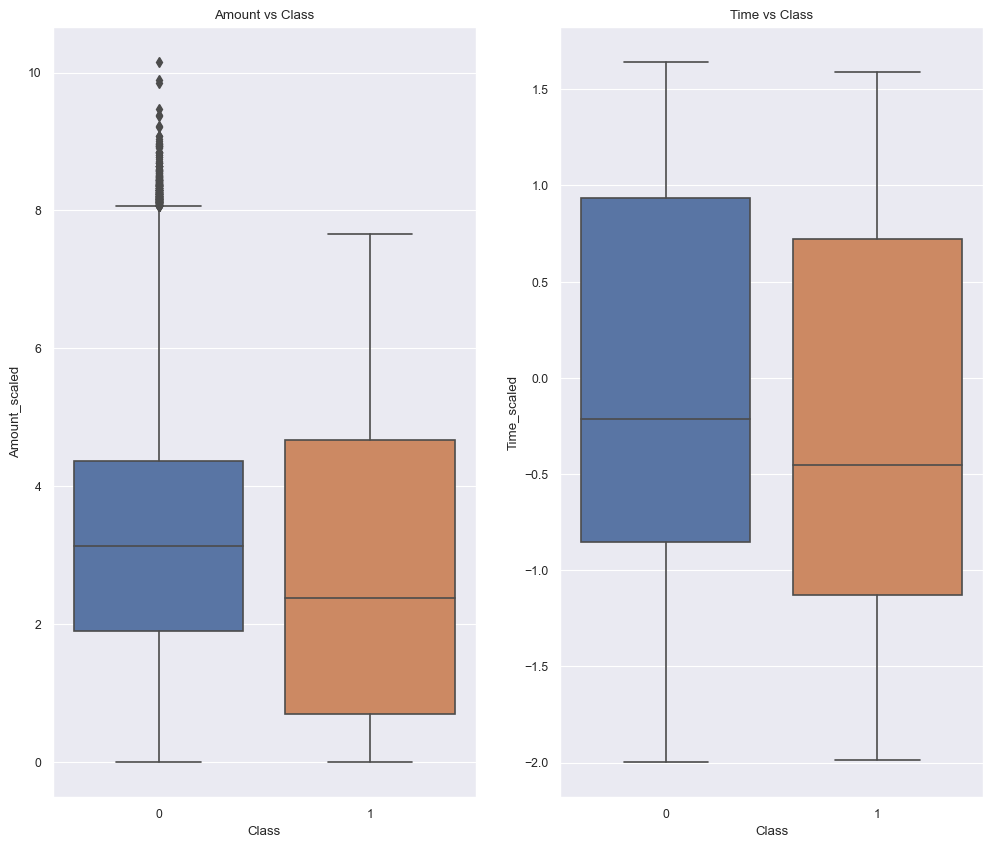

In [15]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
## Boxplot of 'Amount_scaled' vs 'Class'
sns.boxplot(data=df_scaled, x='Class', y='Amount_scaled', ax=axes[0])
axes[0].set_title('Amount vs Class');
## Boxplot of 'Time_scaled' vs 'Class'
sns.boxplot(data=df_scaled, x='Class', y='Time_scaled', ax=axes[1])
axes[1].set_title('Time vs Class');

There are still some outliers in `Amount_scaled` after scaling, but I decide not to dropping outliers based on the context of the analysis.

The outliers in the `Non-Fraud` class, so it kinda make sense and it might be **True Outliers** as the outliers are true reflections of the underlying population (e.g., rare but legitimate high-value transactions) => We might not want to remove the,, as they provide valuable information

### Check the new scaled dataset

In [16]:
display(df_scaled.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_scaled,Time_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.014760,-1.996823
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.305626,-1.996823
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.939276,-1.996802
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.824306,-1.996802
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.262539,-1.996781


### Remove Unscaled variables: `Amount` and `Time`

In [17]:
df_scaled.drop(['Time', 'Amount'], axis=1, inplace=True)
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled,Time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.014760,-1.996823
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.305626,-1.996823
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.939276,-1.996802
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.824306,-1.996802
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.262539,-1.996781


### Correlation Matrices
#### Before `scaled`

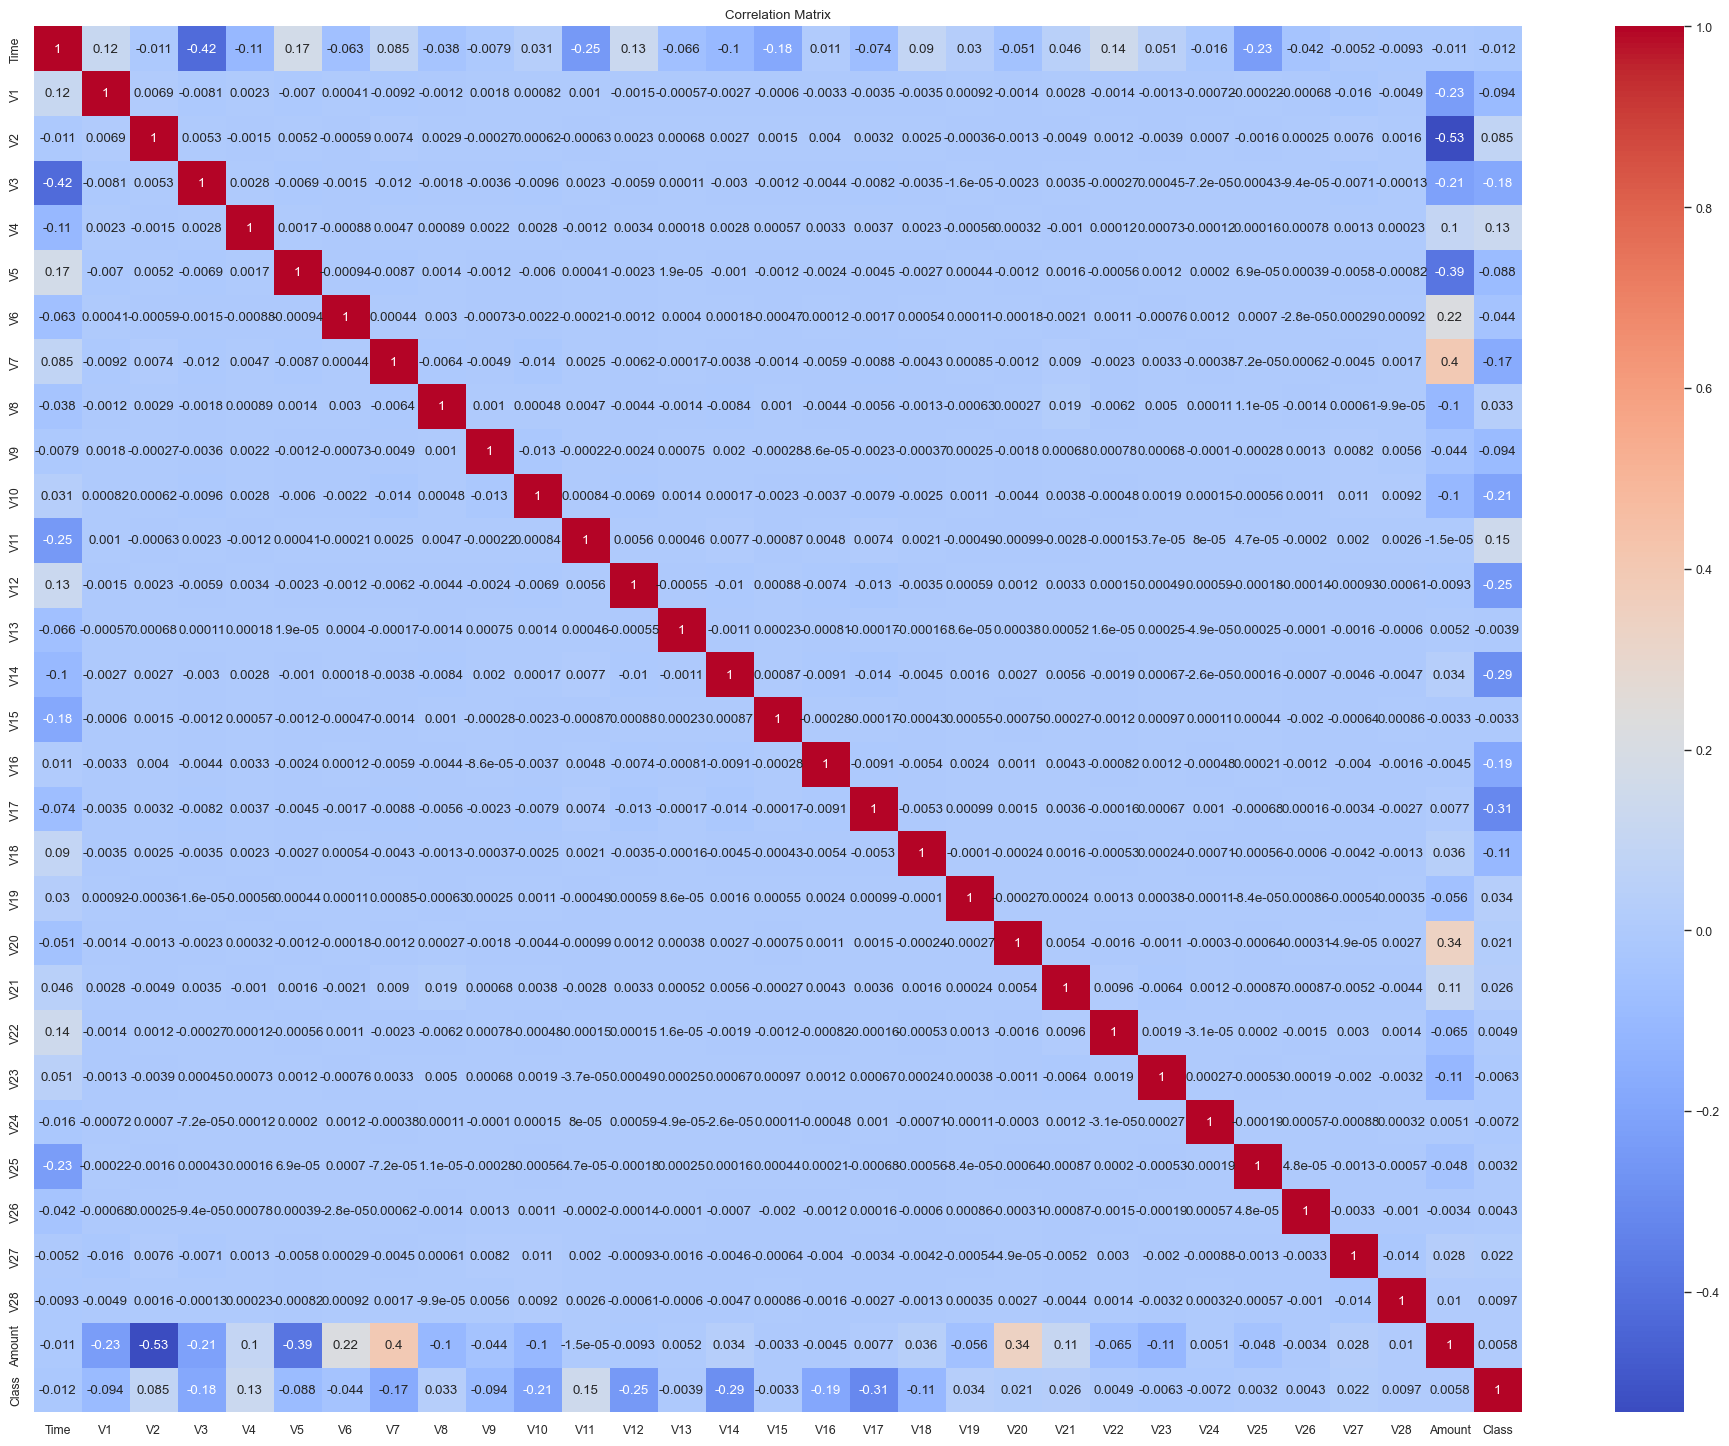

In [18]:
# Correlation
corr = df.corr()
# Checking the correlation in heatmap
plt.figure(figsize=(24,18))
sns.heatmap(corr, cmap='coolwarm', annot=True);
plt.title('Correlation Matrix');

#### After `scaled`

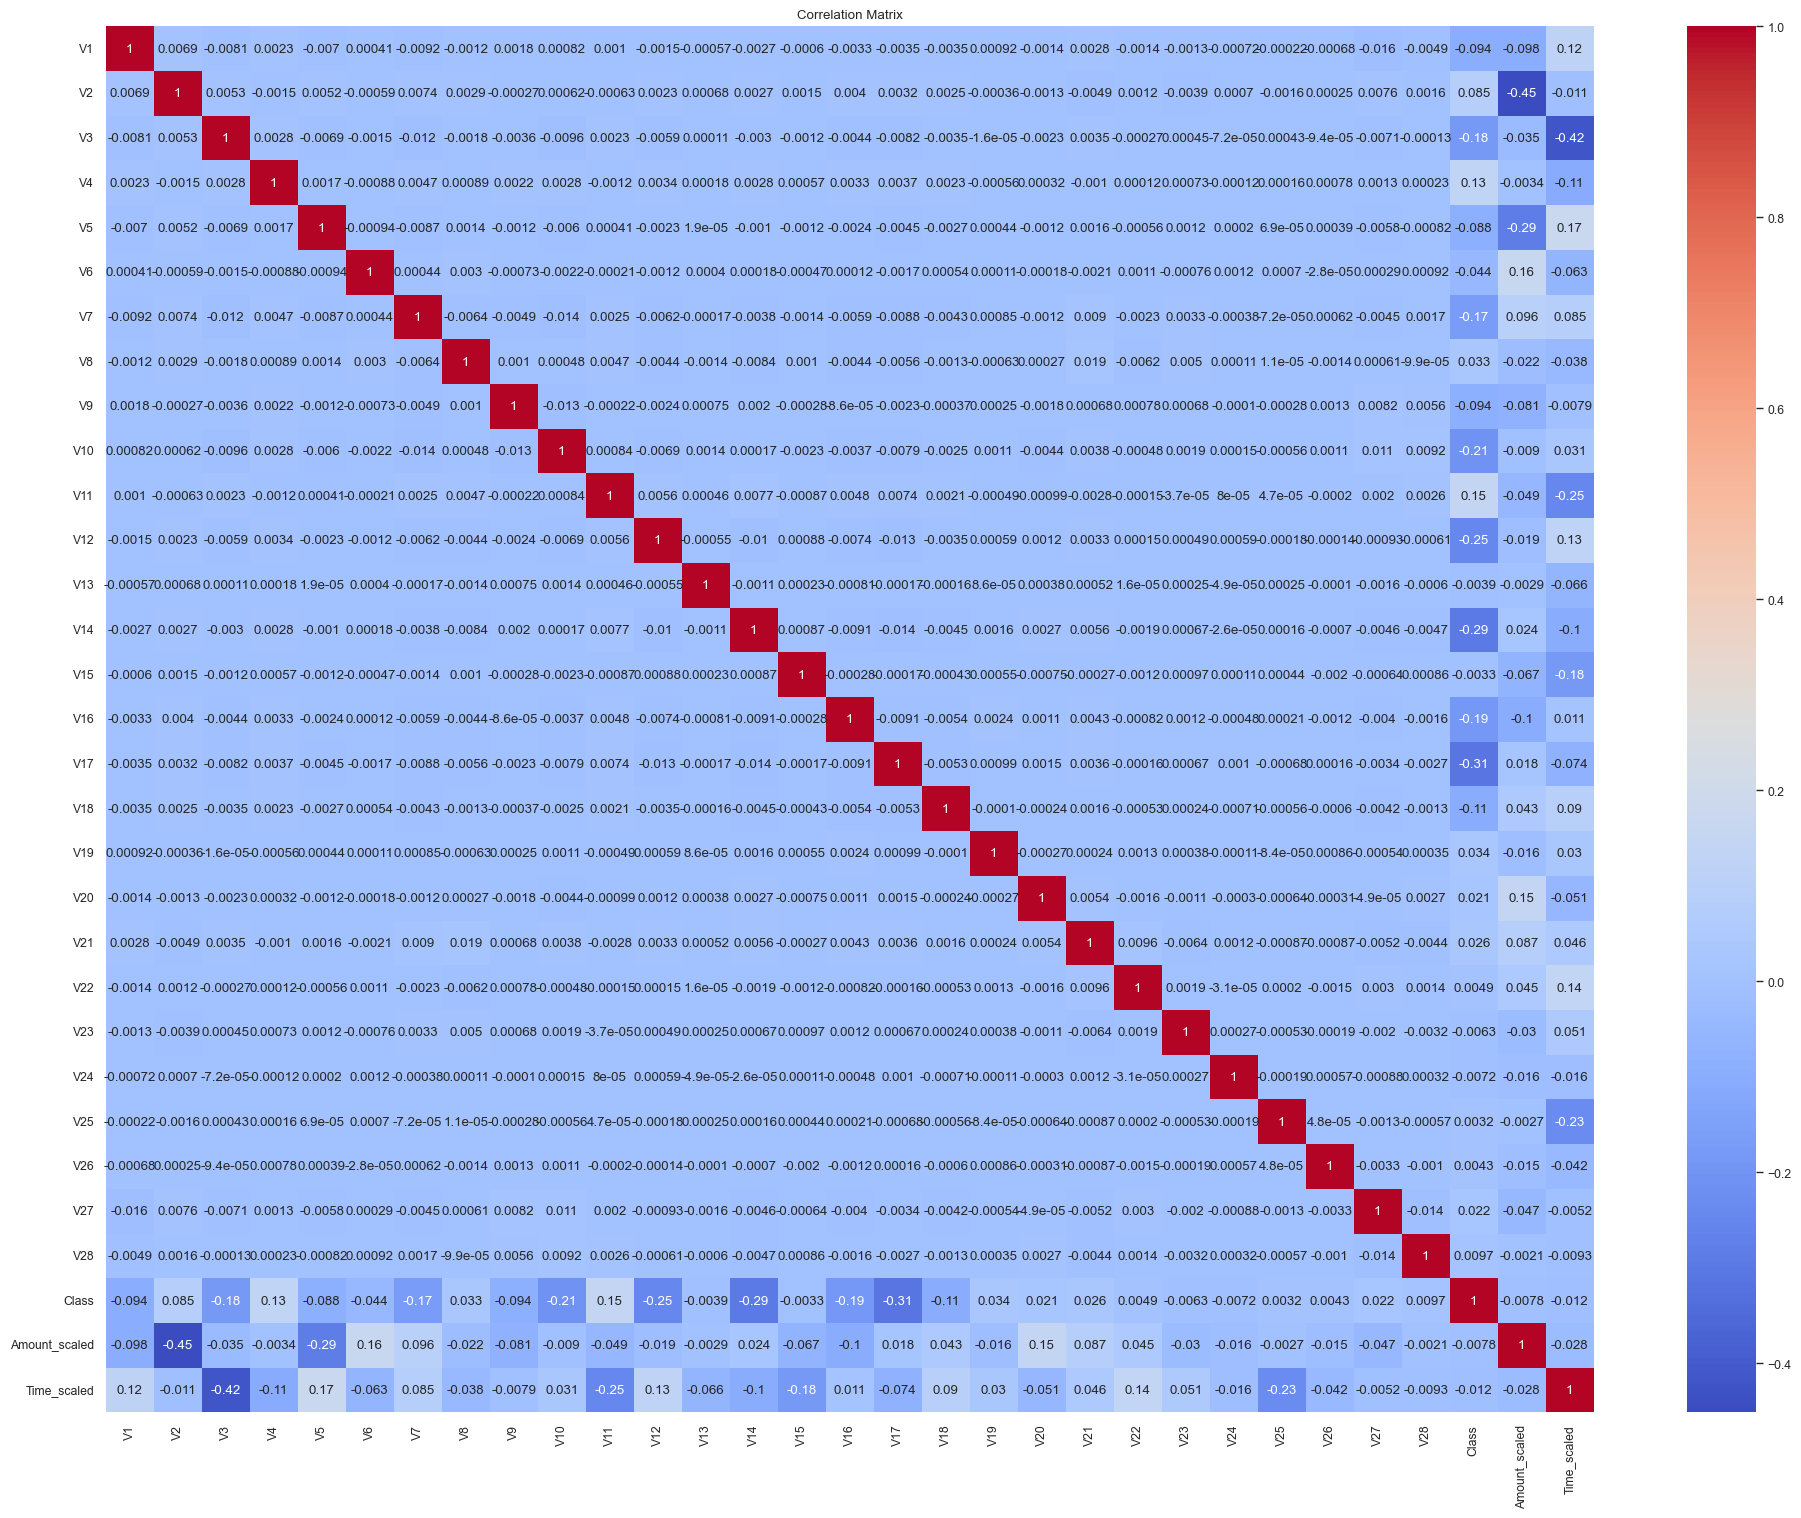

In [19]:
# Correlation
corr = df_scaled.corr()
# Checking the correlation in heatmap
plt.figure(figsize=(24,18))
sns.heatmap(corr, cmap='coolwarm', annot=True);
plt.title('Correlation Matrix');

There is no Strong Correlation

# 1. Hybrid Technique

## <span style="color: darkkhaki;"> 3. Data Reduction
### Split the data

In [ ]:
from sklearn.model_selection import train_test_split
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=seed)

In [ ]:
print('Class Distribution (Training set)', y_train.value_counts())
print('\nClass Distribution (Test set)', y_test.value_counts())

In [ ]:
class_counts = y_test.value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%');
plt.title('Pie Chart showing the Class Distribution of the Test set');

### <span style="color: yellowgreen;"> a. Resampling (Imbalanced data) 
https://hersanyagci.medium.com/random-resampling-methods-for-imbalanced-data-with-imblearn-1fbba4a0e6d3
    
 <span style="color: red;"> Apply on the **Training data only**    

https://imbalanced-learn.org/stable/references/under_sampling.html
    
https://hersanyagci.medium.com/under-sampling-methods-for-imbalanced-data-clustercentroids-randomundersampler-nearmiss-eae0eadcc145
    
https://imbalanced-learn.org/stable/auto_examples/under-sampling/plot_comparison_under_sampling.html#sphx-glr-auto-examples-under-sampling-plot-comparison-under-sampling-py
    


# `Pipeline` (combine Oversampling and Undersampling)
https://hersanyagci.medium.com/random-resampling-methods-for-imbalanced-data-with-imblearn-1fbba4a0e6d3

`RandomOverSampler(0.1)` : 0.1 * majority class

`RandomUnderSampler(0.5)` : 2 * minority class

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

OVER = RandomOverSampler(sampling_strategy=0.01, random_state=seed)
UNDER = RandomUnderSampler(sampling_strategy=0.05, random_state=seed)

steps = [('o', OVER), ('u', UNDER)]
pipeline = Pipeline(steps=steps)
X_train_SMOTE, y_train_SMOTE = pipeline.fit_resample(X_train, y_train)

In [ ]:
print('Class Distribution (Combine)', y_train_SMOTE.value_counts())

In [ ]:
class_counts = y_train_SMOTE.value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%');
plt.title('Pie Chart showing the Class Distribution');

### Correlation Matrix (after `scaled` and `resampling`

In [ ]:
# Convert y_train_SMOTE to a DataFrame and name the column
y_train_SMOTE_df = pd.DataFrame(y_train_SMOTE, columns=['Class'])

# Combine X_train_SMOTE with y_train_SMOTE
df_train_SMOTE = pd.concat([X_train_SMOTE.reset_index(drop=True), 
                            y_train_SMOTE_df.reset_index(drop=True)], axis=1)
# Compute the correlation matrix
corr = df_train_SMOTE.corr()
# Checking the correlation in heatmap
plt.figure(figsize=(24,18))
sns.heatmap(corr, cmap='coolwarm', annot=True);
plt.title('Correlation Matrix');

In [ ]:
# Find strong correlations
strong_corrs = corr[(corr >= 0.70) | (corr <= -0.70)]
# Plot the heatmap for strong correlations
plt.figure(figsize=(12, 10))
sns.heatmap(strong_corrs, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Strong Correlations')
plt.show()

https://medium.com/@abdallahashraf90x/all-you-need-to-know-about-correlation-for-machine-learning-e249fec292e9#:~:text=As%20researchers%20we%20rely%20on,little%20connection%20between%20the%20variables.

- **Strong Positive Correlation** (0.70 ≤r≤ 1.00): `V4` vs `Class`
- **Strong Negative Correlation** (-1.00 ≤r≤ -0.70): `V14` vs `Class`, `V12` vs `Class`

### Boxplots of Strong Positive Correlation Pairs

In [ ]:
"""
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
## Boxplot of 'V12' vs 'Class'
sns.boxplot(data=df_train_SMOTE, x='Class', y='V12', ax=axes[0])
axes[0].set_title('V12 vs Class');
## Boxplot of  vs 'V14' vs 'Class'
sns.boxplot(data=df_train_SMOTE, x='Class', y='V14', ax=axes[1])
axes[1].set_title('V14 vs Class');
# Set a title for the entire figure
fig.suptitle('Boxplots of Strong Negative Correlation Pairs');
"""

In [ ]:

# Calculate the IQR for each group in V4 and V11
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers.count()


In [ ]:
"""
# Count outliers for V12
outliers_v12 = df_train_SMOTE.groupby('Class')['V12'].apply(count_outliers)
print("Number of outliers in V12 by Class:")
print(outliers_v12)
"""
# Count outliers for V14
outliers_v14 = df_train_SMOTE.groupby('Class')['V14'].apply(count_outliers)
print("\nNumber of outliers in V14 by Class:")
print(outliers_v14)


In [ ]:
df_train_SMOTE.shape

In [ ]:
# Function to calculate the lower and upper bounds for outliers
def get_outlier_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Get outlier bounds for V12 and V14
"""bounds_v12 = df_train_SMOTE.groupby('Class')['V12'].apply(get_outlier_bounds).to_dict()"""
bounds_v14 = df_train_SMOTE.groupby('Class')['V14'].apply(get_outlier_bounds).to_dict()

# Function to check if a value is an outlier
def is_outlier(value, bounds):
    lower_bound, upper_bound = bounds
    return value < lower_bound or value > upper_bound

# Filter out the outliers
filtered_df = df_train_SMOTE.copy()
"""
for class_label, (lower_bound, upper_bound) in bounds_v12.items():
    filtered_df = filtered_df[
        ~(
            (filtered_df['Class'] == class_label) & 
            (filtered_df['V12'].apply(lambda x: is_outlier(x, (lower_bound, upper_bound))))
        )
    ]
"""
for class_label, (lower_bound, upper_bound) in bounds_v14.items():
    filtered_df = filtered_df[
        ~(
            (filtered_df['Class'] == class_label) & 
            (filtered_df['V14'].apply(lambda x: is_outlier(x, (lower_bound, upper_bound))))
        )
    ]

# Check the number of rows before and after outlier removal
print("Original DataFrame shape:", df_train_SMOTE.shape)
print("Filtered DataFrame shape:", filtered_df.shape)


In [ ]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
## Boxplot of 'V12' vs 'Class'
""" sns.boxplot(data=filtered_df, x='Class', y='V12', ax=axes[0]) """
axes[0].set_title('V12 vs Class');
## Boxplot of  vs 'V14' vs 'Class'
sns.boxplot(data=filtered_df, x='Class', y='V14', ax=axes[1])
axes[1].set_title('V14 vs Class');
# Set a title for the entire figure
fig.suptitle('Boxplots of Strong Negative Correlation Pairs');

### Boxplots of Strong Negative Correlation Pairs

In [ ]:
"""
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
## Boxplot of 'V4' vs 'Class'
sns.boxplot(data=df_train_SMOTE, x='Class', y='V4', ax=axes[0])
axes[0].set_title('V4 vs Class');
## Boxplot of  vs 'V11' vs 'Class'
sns.boxplot(data=df_train_SMOTE, x='Class', y='V11', ax=axes[1])
axes[1].set_title('V11 vs Class');
# Set a title for the entire figure
fig.suptitle('Boxplots of Strong Positive Correlation Pairs');
"""

In [ ]:
"""
# Count outliers for V4
outliers_v4 = df_train_SMOTE.groupby('Class')['V4'].apply(count_outliers)
print("Number of outliers in V4 by Class:")
print(outliers_v4)

# Count outliers for V11
outliers_v11 = df_train_SMOTE.groupby('Class')['V11'].apply(count_outliers)
print("\nNumber of outliers in V11 by Class:")
print(outliers_v11)
"""

In [ ]:
"""
# Function to calculate the lower and upper bounds for outliers
def get_outlier_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Get outlier bounds for V4 and V11
bounds_v4 = df_train_SMOTE.groupby('Class')['V4'].apply(get_outlier_bounds).to_dict()
bounds_v11 = df_train_SMOTE.groupby('Class')['V11'].apply(get_outlier_bounds).to_dict()

# Function to check if a value is an outlier
def is_outlier(value, bounds):
    lower_bound, upper_bound = bounds
    return value < lower_bound or value > upper_bound

for class_label, (lower_bound, upper_bound) in bounds_v4.items():
    filtered_df = filtered_df[
        ~(
            (filtered_df['Class'] == class_label) & 
            (filtered_df['V4'].apply(lambda x: is_outlier(x, (lower_bound, upper_bound))))
        )
    ]

for class_label, (lower_bound, upper_bound) in bounds_v11.items():
    filtered_df = filtered_df[
        ~(
            (filtered_df['Class'] == class_label) & 
            (filtered_df['V11'].apply(lambda x: is_outlier(x, (lower_bound, upper_bound))))
        )
    ]

# Check the number of rows before and after outlier removal
print("Original DataFrame shape:", df_train_SMOTE.shape)
print("Filtered DataFrame shape:", filtered_df.shape)
"""

In [ ]:
"""
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
## Boxplot of 'V4' vs 'Class'
sns.boxplot(data=filtered_df, x='Class', y='V4', ax=axes[0])
axes[0].set_title('V4 vs Class');
## Boxplot of  vs 'V11' vs 'Class'
sns.boxplot(data=filtered_df, x='Class', y='V11', ax=axes[1])
axes[1].set_title('V11 vs Class');
# Set a title for the entire figure
fig.suptitle('Boxplots of Strong Positive Correlation Pairs');
"""

### Data Distribution Split data after remove outliers

In [ ]:
class_counts = filtered_df['Class'].value_counts()
display(class_counts)
## Data Distribution after remove outliers
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%');
plt.title('Pie Chart showing the Class Distribution');

In [ ]:
from sklearn.model_selection import train_test_split
X_train = filtered_df.drop('Class', axis=1)
y_train = filtered_df['Class']

display(y.shape)

### <span style="color: yellowgreen;"> b. Feature Extraction (Feature Reduction)
Feature extraction is often used when the original features are high-dimensional and complex.     
    
https://www.youtube.com/watch?v=NEaUSP4YerM
    
https://www.ibm.com/topics/principal-component-analysis
    
https://developer.ibm.com/tutorials/awb-k-means-clustering-in-python/

In [ ]:
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the transformed data
print("Original shape of Training set:", X_train.shape)
print("Transformed shape of Training set:", X_train_scaled.shape)

print("\nOriginal shape of Test set:", X_test.shape)
print("Transformed shape of Test set:", X_test_scaled.shape)

In [ ]:
# Apply PCA
pca = PCA(n_components=0.95)  # Preserve 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check the shape of the transformed data
print("Original training feature shape:", X_train_scaled.shape)
print("Reduced training feature shape after PCA:", X_train_pca.shape)

print("\nOriginal test feature shape:", X_test_scaled.shape)
print("Reduced test feature shape after PCA:", X_test_pca.shape)

## <span style="color: olive;">iii. Modeling

In [ ]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
# 2. K-Nearest Neighbour (KNN)
from sklearn.neighbors import KNeighborsClassifier
# 3. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# 4. Random Forest
from sklearn.ensemble import RandomForestClassifier
# 5. XGBoost
from sklearn.ensemble import GradientBoostingClassifier
# 6. Support Vector Machine (SVM)
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_curve, roc_auc_score

### <span style="color: darkkhaki;"> 1. Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    
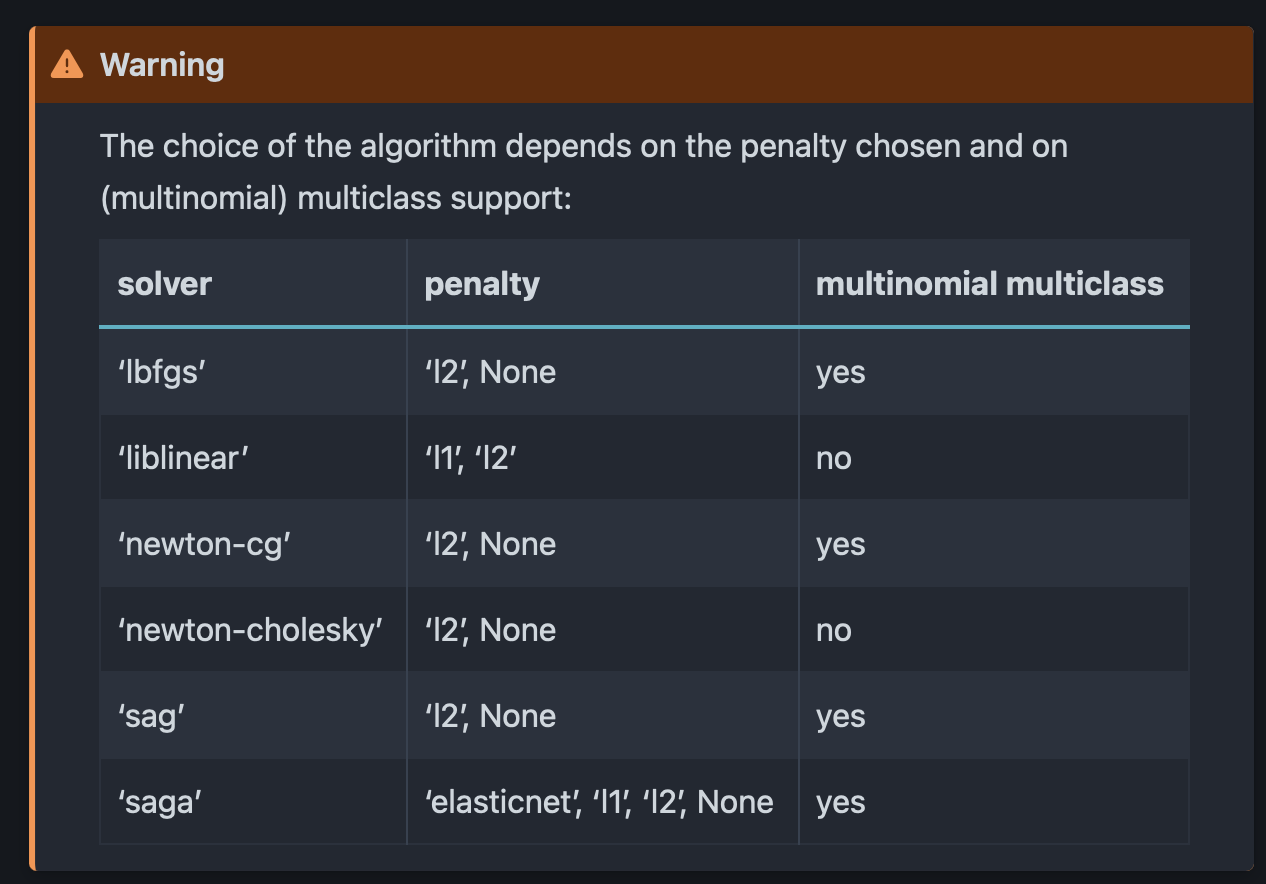

In [ ]:
## Step 1: Define Model
LogisticRegression = LogisticRegression(class_weight='balanced')
## Step 2: Define the hyperparameter grid
param_grid_LR = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1], # Inverse of regularization strength
    'solver': ['liblinear'],
    'max_iter': [100, 200, 500]
}
## Step 3: Set up Grid Search with 5-fold Cross-Validation
grid_search_LR = GridSearchCV(LogisticRegression, 
                              param_grid_LR, 
                           cv=5, scoring='accuracy')

In [ ]:
## Step 4: Fit the model on the Resampling training data 
grid_search_LR.fit(X_train_pca, y_train)

In [ ]:
## Step 5: Best Hyperparameters
best_model_LR = grid_search_LR.best_estimator_

In [ ]:
## Step 6: Evaluation
y_pred_LR = best_model_LR.predict(X_test_pca)
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print("1. Generalization Accuracy for Logistic Regression: ", 
      np.round(accuracy_LR, 4))

### <span style="color: darkkhaki;"> 2. K-Nearest Neighbour (KNN)
    
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [ ]:
## Step 1: Define Model
KNN = KNeighborsClassifier()
## Step 2: Define the hyperparameter grid
param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
## Step 3: Set up Grid Search with 5-fold Cross-Validation
grid_search_KNN = GridSearchCV(KNN, 
                              param_grid_KNN, 
                           cv=5, scoring='accuracy')

In [ ]:
## Step 4: Fit the model on the Resampling training data 
grid_search_KNN.fit(X_train_pca, y_train)

In [ ]:
## Step 5: Best Hyperparameters
best_model_KNN = grid_search_KNN.best_estimator_

In [ ]:
## Step 6: Evaluation
y_pred_KNN = best_model_KNN.predict(X_test_pca)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print("2. Generalization Accuracy for KNN: ", 
      np.round(accuracy_KNN, 4))

### <span style="color: darkkhaki;"> 3. Decision Tree Classifier

In [ ]:
## Step 1: Define Model
Decision_Tree = DecisionTreeClassifier()
## Step 2: Define the hyperparameter grid
param_grid_DT = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
## Step 3: Set up Grid Search with 5-fold Cross-Validation
grid_search_DT = GridSearchCV(Decision_Tree, 
                              param_grid_DT, 
                           cv=5, scoring='accuracy')

In [ ]:
## Step 4: Fit the model on the Resampling training data 
grid_search_DT.fit(X_train_pca, y_train)

In [ ]:
## Step 5: Best Hyperparameters
best_model_DT = grid_search_DT.best_estimator_

In [ ]:
## Step 6: Evaluation
y_pred_DT = best_model_DT.predict(X_test_pca)
accuracy_DT = accuracy_score(y_test, y_pred_DT)
print("\n3. Geneneralization Accuracy for Decision Tree: ", 
      np.round(accuracy_DT, 4))

### <span style="color: darkkhaki;"> 4. Random Forest

In [ ]:
## Step 1: Define Model
Random_Forest = RandomForestClassifier(random_state=seed)
## Step 2: Define the hyperparameter grid
param_grid_RF = {
    'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
## Step 3: Set up Grid Search with 5-fold Cross-Validation
grid_search_RF = GridSearchCV(Random_Forest, 
                              param_grid_RF, 
                           cv=5, scoring='accuracy')

In [ ]:
## Step 4: Fit the model on the Resampling training data 
grid_search_RF.fit(X_train_pca, y_train)

In [ ]:
## Step 5: Best Hyperparameters
best_model_RF = grid_search_RF.best_estimator_

In [ ]:
## Step 6: Evaluation
y_pred_RF = best_model_RF.predict(X_test_pca)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("\n4. Geneneralization Accuracy for Random Forest: ", 
      np.round(accuracy_RF, 4))

### <span style="color: darkkhaki;"> 5. XGBoost
    
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

In [ ]:
## Step 1: Define Model
XGBoosting = GradientBoostingClassifier(random_state=seed)
## Step 2: Define the hyperparameter grid
param_grid_XGB = {
    'n_estimators': [100, 300],  
    'learning_rate': [0.01, 0.1],  
    'max_depth': [3, 6], 
    'subsample': [0.8, 1.0], 
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2]
}
## Step 3: Set up Grid Search with 5-fold Cross-Validation
grid_search_XGBoost = GridSearchCV(XGBoosting, 
                              param_grid_XGB, 
                           cv=5, scoring='accuracy')

In [ ]:
## Step 4: Fit the model on the Resampling training data 
grid_search_XGBoost.fit(X_train_pca, y_train)

In [ ]:
## Step 5: Best Hyperparameters
best_model_XGBoost = grid_search_XGBoost.best_estimator_

In [ ]:
## Step 6: Evaluation
y_pred_XGBoost = best_model_XGBoost.predict(X_test_pca)
accuracy_XGBoost = accuracy_score(y_test, y_pred_XGBoost)
print("\n5. Geneneralization Accuracy for XGBoost: ", 
      np.round(accuracy_XGBoost, 4))

### <span style="color: darkkhaki;"> 6. Support Vector Machine (SVC)

In [ ]:
## Step 1: Define Model
Support_Vector_Classifier = SVC() 
## Step 2: Define the hyperparameter grid
param_grid_SVC = {
    'C': [0.1, 1, 10, 100],
    #'kernel': ['linear', 'rbf', 'poly'] # wrong
}
## Step 3: Set up Grid Search with 5-fold Cross-Validation
grid_search_SVC = GridSearchCV(Support_Vector_Classifier, 
                              param_grid_SVC, 
                           cv=5, scoring='accuracy')

In [ ]:
## Step 4: Fit the model on the Resampling training data 
grid_search_SVC.fit(X_train_pca, y_train)

In [ ]:
## Step 5: Best Hyperparameters
best_model_SVC = grid_search_SVC.best_estimator_

In [ ]:
## Step 6: Evaluation
y_pred_SVC = best_model_SVC.predict(X_test_pca)
accuracy_SVC = accuracy_score(y_test, y_pred_SVC)
print("\n6. Geneneralization Accuracy for SVC: ", 
      np.round(accuracy_SVC, 4))

# 2. `RandomUnderSampler`
i. Dataset

ii. Preprocessing
- Data Cleaning
- Data Transformation: scaled
### Split the data

In [20]:
from sklearn.model_selection import train_test_split
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=seed)

In [21]:
print('Class Distribution (Training set)', y_train.value_counts())
print('\nClass Distribution (Test set)', y_test.value_counts())

Class Distribution (Training set) Class
0    198290
1       318
Name: count, dtype: int64

Class Distribution (Test set) Class
0    84963
1      155
Name: count, dtype: int64


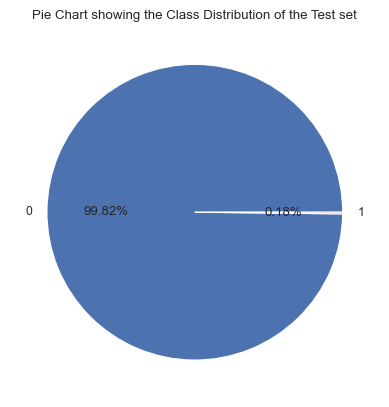

In [22]:
class_counts = y_test.value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%');
plt.title('Pie Chart showing the Class Distribution of the Test set');

### Try Undersampling (50%, 50%, fast)

In [23]:
from imblearn.under_sampling import RandomUnderSampler

Under = RandomUnderSampler(random_state=seed)
X_train_Under, y_train_Under = Under.fit_resample(X_train, y_train)
print('Class Distribution (Training)', y_train_Under.value_counts())

Class Distribution (Training) Class
0    318
1    318
Name: count, dtype: int64


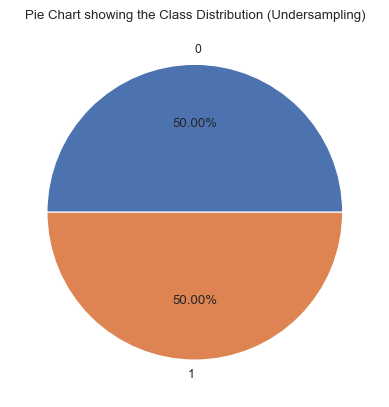

In [24]:
class_counts = y_train_Under.value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%');
plt.title('Pie Chart showing the Class Distribution (Undersampling)');

### Dimensionality Reduction and Clustering (Visualization)
Try `t-SNE`, `PCA`, and `SVD` on training predictors (X_train_Under) 

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

In [25]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

## t-SNE Implementation (X_train_Under)
t0 = time.time()
X_embedded_TSNE = TSNE(n_components=2, 
                       random_state=seed).fit_transform(X_train_Under)
t1 = time.time()
print(f'T-SNE took: {round(t1-t0,2)} s')

## PCA Implementation (X_train_Under)
t0 = time.time()
X_embedded_PCA = PCA(n_components=2, 
                       random_state=seed).fit_transform(X_train_Under)
t1 = time.time()
print(f'PCA took: {round(t1-t0,4)} s')

## TruncatedSVD Implementation (X_train_Under)
t0 = time.time()
X_embedded_TruncatedSVD = TruncatedSVD(n_components=2, 
                       random_state=seed).fit_transform(X_train_Under)
t1 = time.time()
print(f'TruncatedSVD took: {round(t1-t0,4)} s')

T-SNE took: 1.81 s
PCA took: 0.0047 s
TruncatedSVD took: 0.0024 s


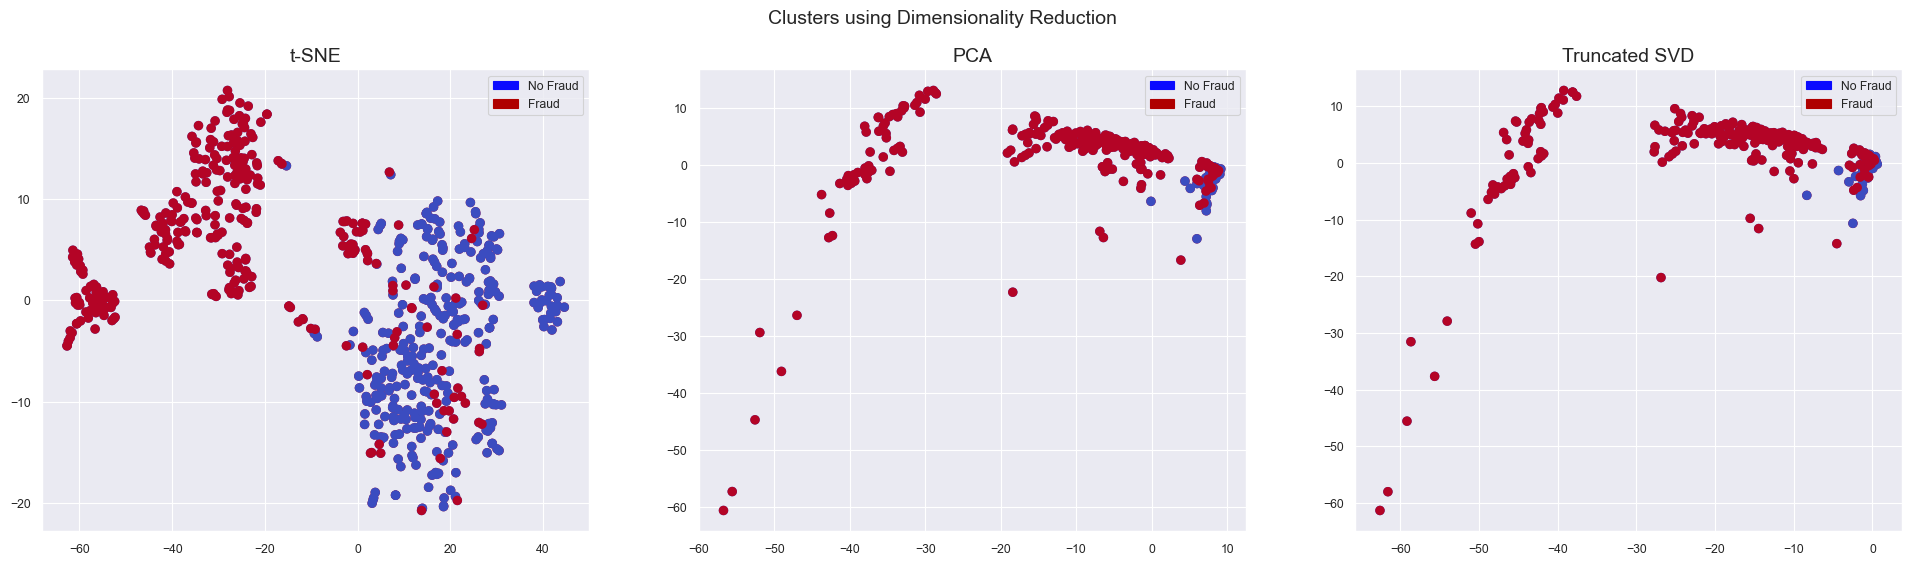

In [26]:
import matplotlib.patches as mpatches
## VISUALIZATION

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot ----------------------------------------
ax1.scatter(X_embedded_TSNE[:,0], X_embedded_TSNE[:,1], c=(y_train_Under == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_embedded_TSNE[:,0], X_embedded_TSNE[:,1], c=(y_train_Under == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot ----------------------------------------
ax2.scatter(X_embedded_PCA[:,0], X_embedded_PCA[:,1], c=(y_train_Under == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_embedded_PCA[:,0], X_embedded_PCA[:,1], c=(y_train_Under == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot -----------------------------------
ax3.scatter(X_embedded_TruncatedSVD[:,0], X_embedded_TruncatedSVD[:,1], c=(y_train_Under == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_embedded_TruncatedSVD[:,0], X_embedded_TruncatedSVD[:,1], c=(y_train_Under == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

### Learning Curves for `LogisticRegression`

https://medium.com/@alexstrebeck/training-and-testing-machine-learning-models-e1f27dc9b3cb

/Users/vydao/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
23 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/vydao/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vydao/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/vydao/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.p

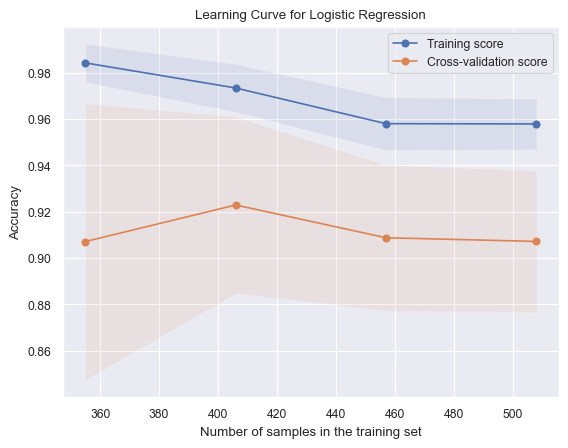

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.model_selection import learning_curve
# Define model
model_LR = LogisticRegression()

# kf
kf = KFold(n_splits=5, random_state=seed)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(model_LR, 
                                                        X_train_Under, 
                                                        y_train_Under, 
                                                        cv=kf, 
                                                        scoring='accuracy', 
                                                        n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))
# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
#plt.figure()
plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Number of samples in the training set")
plt.ylabel("Accuracy")

# Plot the average training and cross-validation score with standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")

plt.legend(loc="best")
plt.show()

**Interpret:**

- The **training score (blue line)** starts high and slightly decreases as the number of training samples increases. This suggests that the model is performing very well on the training data and has high accuracy.
- The **cross-validation score (orange line)** is lower than the training score and remains relatively stable => This indicates that while the model performs well on the training data, it is not performing as well on unseen data (validation set).
- There is a **noticeable gap between the training and cross-validation scores**. This gap suggests that the model might be overfitting the training data, meaning it captures noise in the training data rather than the underlying patterns.

**Actions based on Learning Curve Analysis:**
1. **Regularization:** Increase the regularization parameter C to reduce overfitting. This will penalize complex models and help the model generalize better.
2. **More Training data:** More data can help the model learn better patterns and reduce overfitting.
3. **Hyperparameter Tuning:** Perform more extensive hyperparameter tuning using techniques like `RandomizedSearchCV` or `GridSearchCV` to find the best set of parameters for your model.
4. **Cross-Validation**
5. **Ensemble Methods:** Try more different models

### Choose Models

https://medium.com/@alexstrebeck/training-and-testing-machine-learning-models-e1f27dc9b3cb

Testing our model with Kfolds and on the test set. 

There are many ways to go about this, however a rather simple and good first pass attempt is to just train a few different models on the same data and see what score they each achieve “out of the box”.

As we will see later, we can take the top two best performing models and tune them each individually to get even better results. 

In order to score each of the model we will be using a indicator called **Area under the Curve**. 

1. Logistic Regression
2. K-Nearest Neighbour (KNN)
3. Decision Tree Classifier
4. Random Forest
5. XGBoost
6. Support Vector Machine (SVM)
7. Naive Bayes

In [29]:
# Dictionary to store the results
results = {}

### 1. LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_Under, y_train_Under, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Logistic Regression): ", scores.mean())

results['1.LR'] = scores.mean()

Mean AUC Score (Logistic Regression):  0.973562282986111


In [30]:
### 2. K-NEAREST-NEIGHBOUR (KNN)
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_Under, y_train_Under, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (K-Nearest Neighbour): ", scores.mean())

results['2.KNN'] = scores.mean()

Mean AUC Score (K-Nearest Neighbour):  0.9719296409970237


In [31]:
### 3. DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_Under, y_train_Under, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Decision Tree): ", scores.mean())

results['3.DT'] = scores.mean()

Mean AUC Score (Decision Tree):  0.9040674603174603


In [32]:
### 4. RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_Under, y_train_Under, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Random Forest): ", scores.mean())

results['4.RF'] = scores.mean()

Mean AUC Score (Random Forest):  0.9763912140376985


In [33]:
### 5. XGBOOST
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_Under, y_train_Under, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (XGBoost): ", scores.mean())

results['5.XGB'] = scores.mean()

Mean AUC Score (XGBoost):  0.972948443700397


In [34]:
### 6. SUPPORT VECTOR MACHINE (SVM)
from sklearn.svm import SVC

model = SVC()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_Under, y_train_Under, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Support Vector Machine): ", scores.mean())

results['6.SVM'] = scores.mean()

Mean AUC Score (Support Vector Machine):  0.9792898995535714


In [35]:
### 7. NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_Under, y_train_Under, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Gaussian Naive Bayes): ", scores.mean())

results['7.NB'] = scores.mean()

Mean AUC Score (Gaussian Naive Bayes):  0.9545778304811507


In [36]:
# Create DataFrame from results
df_chooseModels = pd.DataFrame(list(results.items()), columns=['Model', 'Mean AUC Score'])

# Sort DataFrame by Mean AUC Score in descending order
df_chooseModels = df_chooseModels.sort_values(by='Mean AUC Score', ascending=False)

display(df_chooseModels)

,Model,Mean AUC Score
5,6.SVM,0.979290
3,4.RF,0.976391
0,1.LR,0.973562
4,5.XGB,0.972948
1,2.KNN,0.971930
6,7.NB,0.954578
2,3.DT,0.904067


**Results:**
From the 7 scores above the top 4 performers were:
- SVM
- RF
- LR
- XGB

We will move ahead and fine tune them.

### Using `GridSearchCV` for exploring hyper parameters
This whole time we have been evaluating our models based on some measure called the **Area Under the Curve (AUC)**, but what is it?

Answer in Compute AUC for a set of results (link): 
https://medium.com/@alexstrebeck/training-and-testing-machine-learning-models-e1f27dc9b3cb

- True Positive Rate (TPR) / Sensitivity: This is plotted on the y-axis. It measures the proportion of actual positives correctly identified by the model.
- False Positive Rate (FPR): This is plotted on the x-axis. It measures the proportion of actual negatives that are incorrectly identified as positives by the model.
- Curve Shape: The ROC curve starts at (0, 0) and ends at (1, 1).

The more area that we have under the curve, the better the model was at predicting classes and thus we have a higher rate of true positives while holding the number of false positives at a much lower rate. The big take away here is that a bigger AUC score will generally correspond to a better model.

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

### 6. SVM -------------------------------------------------
tuned_parameters = {
    'C': [0.1, 1, 10, 100],
    'probability': [True]
}

clf_SVM = GridSearchCV(SVC(), tuned_parameters, 
                       cv=kf, scoring= 'roc_auc')

clf_SVM.fit(X_train_Under, y_train_Under)

print('Best parameters:', clf_SVM.best_params_)
print("\nOptimized trainning model achieved an ROC of (SVM): ", 
      round(clf_SVM.score(X_train_Under, y_train_Under), 4))

Best parameters: {'C': 1, 'probability': True}

Optimized trainning model achieved an ROC of (SVM):  0.9864


**ROC Curve Interpretation:**
- The SVM model with the optimized parameters (C=1 and probability=True) performs very well, as indicated by the high AUC score of 0.9864.
- The ROC curve supports this by showing that the model has a strong ability to differentiate between the positive and negative classes, with most of the curve being close to the top-left corner.

## BO SUNG 3 OTHER GRIDSEARCH MODELS

In [49]:
### 4. RANDOM FOREST (RF)
tuned_parameters = {
    'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

clf_RF = GridSearchCV(RandomForestClassifier(), tuned_parameters, 
                   cv=kf, scoring= 'roc_auc')

clf_RF.fit(X_train_Under, y_train_Under)

print('Best parameters:', clf_RF.best_params_)

# Training ROC AUC
print(f"\nTraining ROC AUC of (RANDOM FOREST): {clf_RF.score(X_train_Under, y_train_Under)}")


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Training ROC AUC of (RANDOM FOREST): 1.0


### Evaluate on Test Data

SVM Test AUC: 0.9798
---------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84963
           1       0.10      0.88      0.19       155

    accuracy                           0.99     85118
   macro avg       0.55      0.94      0.59     85118
weighted avg       1.00      0.99      0.99     85118



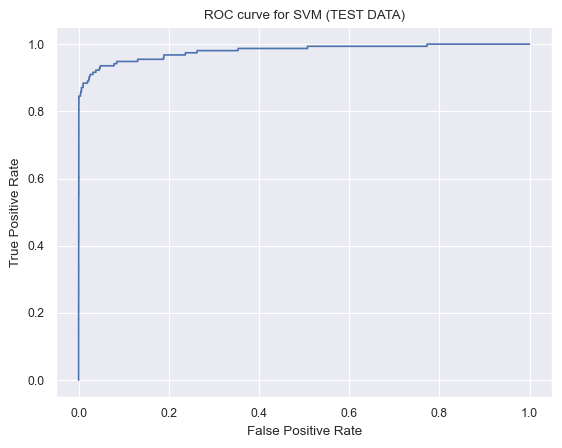

In [47]:
# Evaluating on Test Data
from sklearn.metrics import roc_auc_score, classification_report

## 6. SVM ----------------------------------------------
svm_model = SVC(C=1, probability=True) # best hyperparameters
svm_model.fit(X_train_Under, y_train_Under) 

y_pred_svm = svm_model.predict(X_test) 
print("SVM Test AUC:", round(roc_auc_score(y_test, 
                                     svm_model.predict_proba(X_test)[:, 1]),4))

## Classification Report --------------------------------------
print('---------------------------')
print(classification_report(y_test, y_pred_svm))

## Plot ROC curve ---------------------------------------------
# Predict probabilities
proba = svm_model.predict_proba(X_test)
# Producing the same false/true positive data via a library and plotting it
fpr, tpr, _ = metrics.roc_curve(y_test, proba[:,1])

# Plotting the ROC curve
plt.plot(fpr,tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for SVM (TEST DATA)");

Random Forest Test AUC: 0.9799
---------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84963
           1       0.08      0.90      0.15       155

    accuracy                           0.98     85118
   macro avg       0.54      0.94      0.57     85118
weighted avg       1.00      0.98      0.99     85118



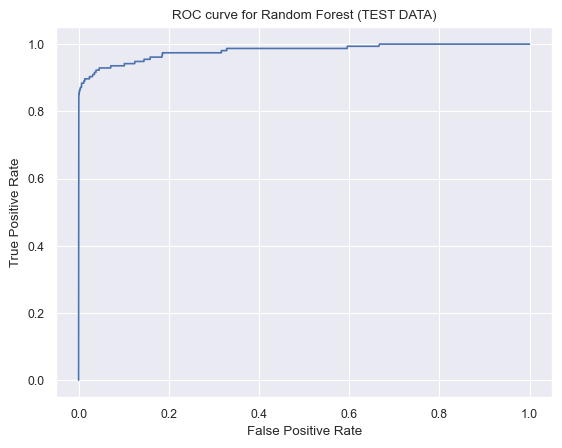

In [52]:
## 4. RANDOM FOREST (RF) ------------------------------------

# Train the model with the best hyperparameters found
RF_model = RandomForestClassifier(**clf_RF.best_params_)
RF_model.fit(X_train_Under, y_train_Under)

# Predict on the test data
y_pred_RF = RF_model.predict(X_test)

# Calculate and print the ROC AUC score on the test data
print("Random Forest Test AUC:", round(roc_auc_score(y_test, RF_model.predict_proba(X_test)[:, 1]), 4))

# Print classification report for the test data ----------------
print('---------------------------')
print(classification_report(y_test, y_pred_RF))

# Plot ROC curve ----------------------------------------------
# Predict probabilities for the test data
proba_RF = RF_model.predict_proba(X_test)
# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_RF, tpr_RF, _RF = metrics.roc_curve(y_test, proba_RF[:, 1])

# Plotting the ROC curve
plt.plot(fpr_RF, tpr_RF)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for Random Forest (TEST DATA)")
plt.show()

## BO SUNG 3 OTHER EVALUATION MODELS
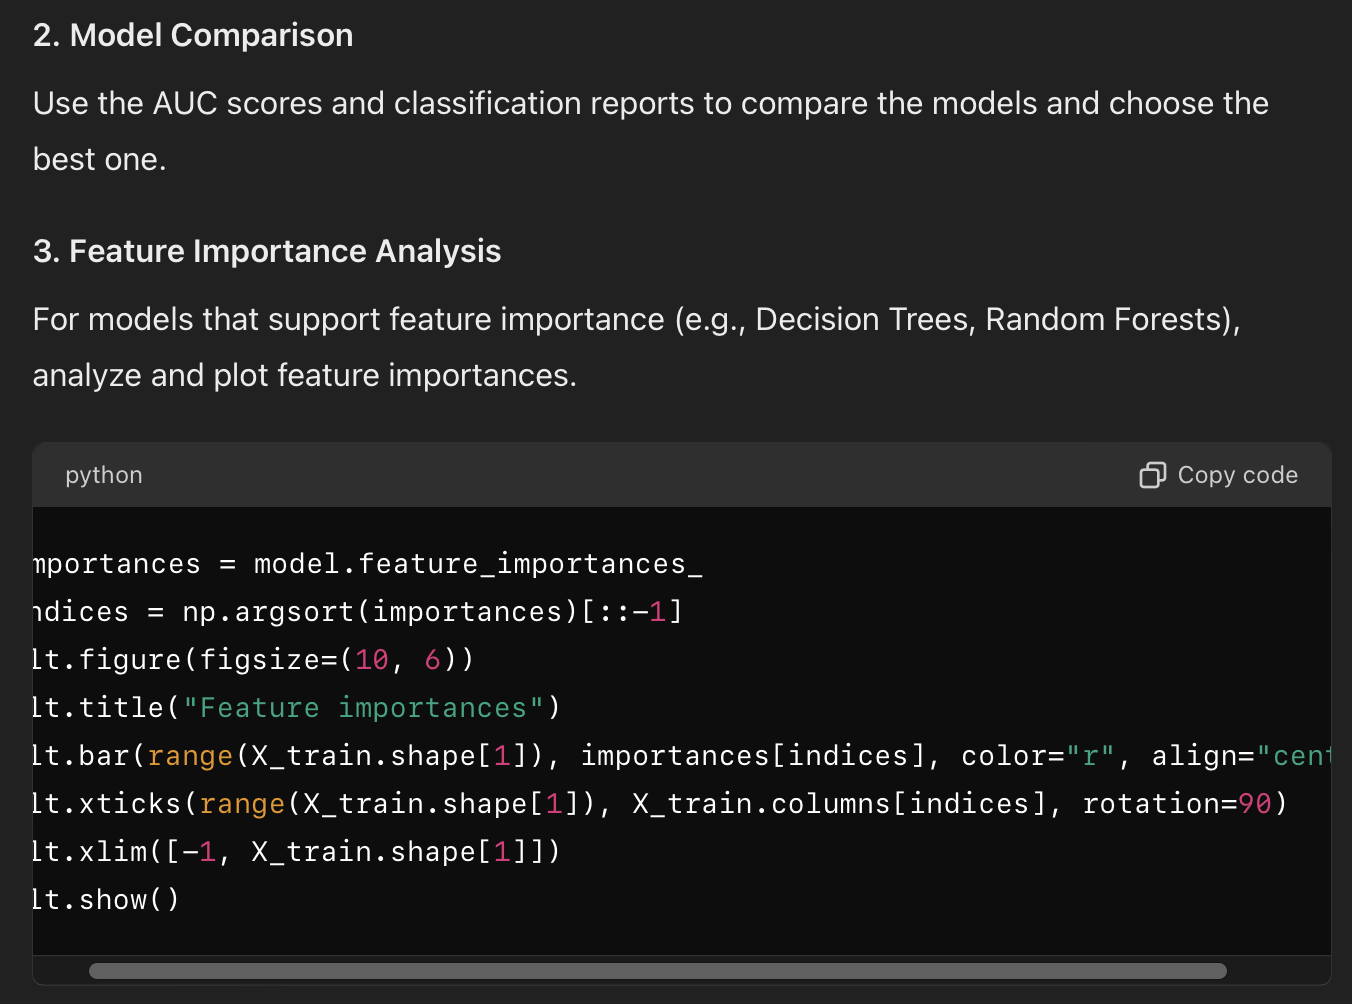
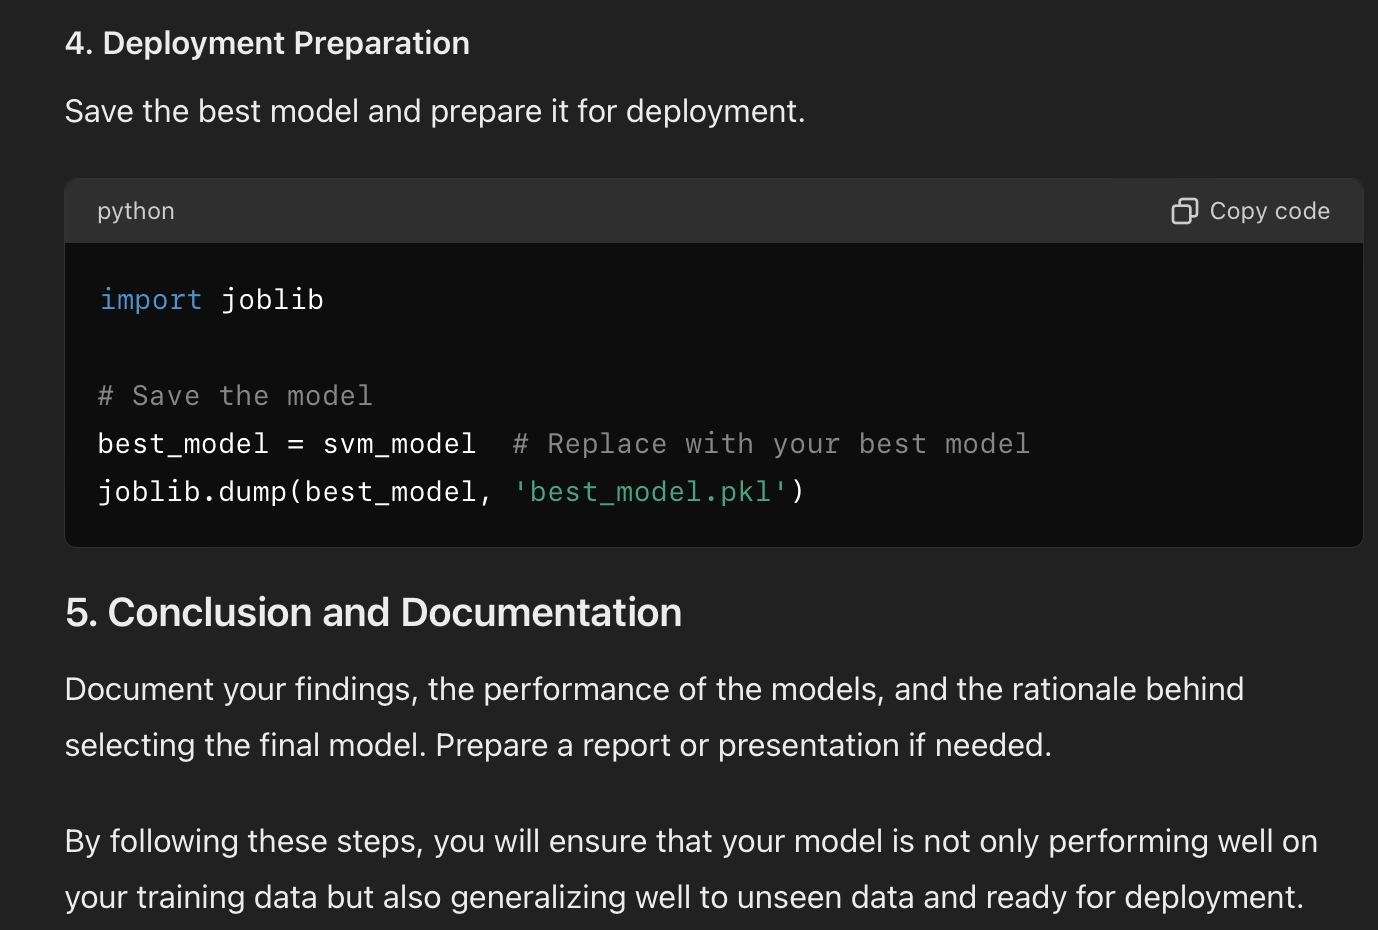


**joblib**
https://www.analyticsvidhya.com/blog/2023/02/how-to-save-and-load-machine-learning-models-in-python-using-joblib-library/

**Compare basic** https://towardsdatascience.com/how-to-compare-a-classification-model-to-a-baseline-fc3483367770